# 加载Pandas库

In [1]:
import pandas as pd

# 核心数据类型

## DataFrame

In [2]:
df = pd.DataFrame()

## Series

# 输入输出

In [3]:
df = pd.read_hdf('/home/jovyan/work/samples/wind_obs.h5')
print(df)

                              sid    hgt   wd   ws  ws_min  ws_max  ws_std
time                                                                      
2019-05-20 05:30:00+00:00  010001   30.0  190  3.9     0.4    10.2     1.8
2019-05-20 05:40:00+00:00  010001   30.0  188  3.9     0.4     7.2     1.3
2019-05-20 05:50:00+00:00  010001   30.0  173  2.8     0.4     8.0     1.5
2019-05-20 06:00:00+00:00  010001   30.0  194  3.7     1.1     8.0     1.6
2019-05-20 06:10:00+00:00  010001   30.0  216  2.0     0.4     5.7     1.0
...                           ...    ...  ...  ...     ...     ...     ...
2020-07-31 15:10:00+00:00  010001  100.0  189  7.0     5.7     7.9     0.4
2020-07-31 15:20:00+00:00  010001  100.0  185  6.8     4.9     7.9     0.5
2020-07-31 15:30:00+00:00  010001  100.0  182  6.2     4.1     7.9     0.6
2020-07-31 15:40:00+00:00  010001  100.0  182  5.9     4.9     7.2     0.4
2020-07-31 15:50:00+00:00  010001  100.0  181  6.1     5.7     6.4     0.4

[304860 rows x 7 columns

In [4]:
df.to_csv('/home/jovyan/work/samples/wind_obs.csv')

# 变量索引

In [5]:
df = pd.read_hdf('/home/jovyan/work/samples/wind_obs.h5')

查看有哪些变量或列

In [6]:
print(df.columns)

Index(['sid', 'hgt', 'wd', 'ws', 'ws_min', 'ws_max', 'ws_std'], dtype='object')


查看有哪些高度层

In [7]:
print(df.hgt.unique())

[ 30.  50.  70.  90. 100.]


获取某个高度层上的风速

In [8]:
ws = df.ws[df.hgt==100]
print(type(ws))
print(ws)

<class 'pandas.core.series.Series'>
time
2019-05-20 05:30:00+00:00    4.2
2019-05-20 05:40:00+00:00    4.0
2019-05-20 05:50:00+00:00    2.7
2019-05-20 06:00:00+00:00    3.9
2019-05-20 06:10:00+00:00    3.4
                            ... 
2020-07-31 15:10:00+00:00    7.0
2020-07-31 15:20:00+00:00    6.8
2020-07-31 15:30:00+00:00    6.2
2020-07-31 15:40:00+00:00    5.9
2020-07-31 15:50:00+00:00    6.1
Name: ws, Length: 60972, dtype: float64


筛选某个时间段

In [10]:
ws = ws['2019-10':'2019-12']
print(ws)

time
2019-10-01 00:00:00+00:00    11.1
2019-10-01 00:10:00+00:00    11.1
2019-10-01 00:20:00+00:00    10.5
2019-10-01 00:30:00+00:00    11.1
2019-10-01 00:40:00+00:00    12.2
                             ... 
2019-12-31 23:10:00+00:00     3.5
2019-12-31 23:20:00+00:00     3.5
2019-12-31 23:30:00+00:00     4.1
2019-12-31 23:40:00+00:00     4.4
2019-12-31 23:50:00+00:00     4.8
Name: ws, Length: 12815, dtype: float64


# 数据绘图

<AxesSubplot:xlabel='time'>

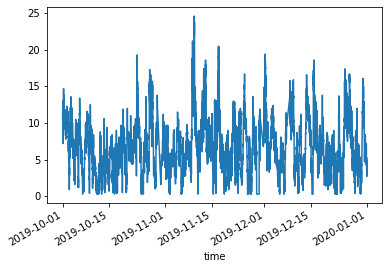

In [11]:
ws.plot()

上面的图形是静止的，我们利用ipympl把图形变为交互式的

In [12]:
import matplotlib.pyplot as plt
# %matplotlib widget

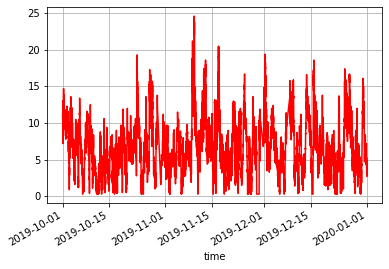

In [13]:
ws.plot(color='red', grid=True)
plt.show()

画日平均曲线

<AxesSubplot:xlabel='time'>

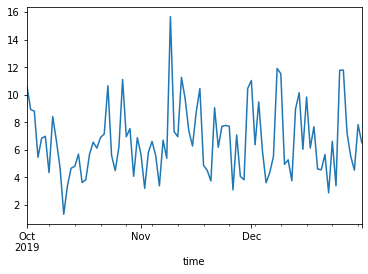

In [23]:
ws.resample('1D').mean().plot()

画风速分布

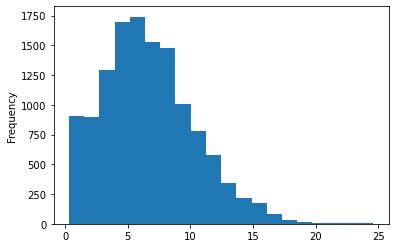

In [24]:
ws.plot.hist(bins=20)
plt.show()

<AxesSubplot:ylabel='Frequency'>

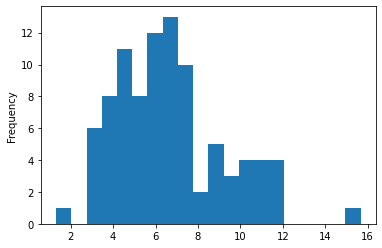

In [26]:
ws.resample('1D').mean().plot.hist(bins=20)

# 统计功能

In [30]:
print('mean:', ws.mean())
print('std:', ws.std())

mean: 6.662247366367608
std: 3.7034845722492964


Text(0.5, 1.0, 'Correlation: 0.92')

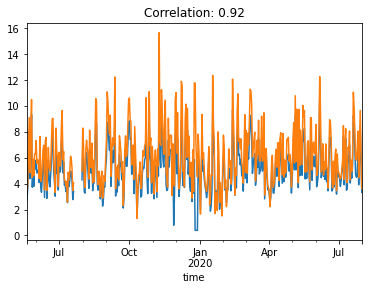

In [46]:
ws1 = df[df.hgt==30].ws
ws2 = df[df.hgt==100].ws
ws1.resample('1D').mean().plot()
ws2.resample('1D').mean().plot()
plt.title(f'Correlation: {"%.2f" % ws1.corr(ws2)}')